In [4]:
!pip install --upgrade -q accelerate bitsandbytes
!pip install git+https://github.com/huggingface/transformers.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.0 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-r26783qv
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-r26783qv
  Resolved https://github.com/huggingface/transformers.git to commit 15bd3e61f8d3680ca472c9314ad07584d20f7b81
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.49.0.dev0-py3-none-any.whl size=10450848 sha256=6153fadc81896112e773e004f2a77382dbd85ee7ffb30f3627dfce9f8670061d
  Stored in directory: /tmp/pip-ephem-wheel-cache-5jrormbd/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:

## Load the model

In [5]:
from transformers import BitsAndBytesConfig, LlavaOnevisionForConditionalGeneration, LlavaOnevisionProcessor
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

model = LlavaOnevisionForConditionalGeneration.from_pretrained("llava-hf/llava-onevision-qwen2-0.5b-ov-hf", torch_dtype="float16", device_map='auto')
processor = LlavaOnevisionProcessor.from_pretrained("llava-hf/llava-onevision-qwen2-0.5b-ov-hf")
processor.tokenizer.padding_side = "left"

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/126 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/178 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

video_processor/preprocessor_config.json:   0%|          | 0.00/428 [00:00<?, ?B/s]

## Preparing the video and image inputs

In order to read the video we'll use `av` and sample 8 frames. You can try to sample more frames if the video is long. The model was trained with 32 frames, but can ingest more as long as we're in the LLM backbone's max sequence length range.

In [11]:


from PIL import Image
import requests

image_002 = Image.open("databemader/002.jpg")
image_003 = Image.open("databemader/003.jpg")
image_004 = Image.open("databemader/004.jpg")
image_005 = Image.open("databemader/005.jpg")
image_006 = Image.open("databemader/006.jpg")
image_007 = Image.open("databemader/007.jpg")
image_008 = Image.open("databemader/008.jpg")
image_009 = Image.open("databemader/009.jpg")
image_010 = Image.open("databemader/010.jpg")
image_011 = Image.open("databemader/011.jpg")
image_012 = Image.open("databemader/012.jpg")
image_013 = Image.open("databemader/013.jpg")
image_014 = Image.open("databemader/014.jpg")
image_015 = Image.open("databemader/015.jpg")
image_016 = Image.open("databemader/016.jpg")
image_017 = Image.open("databemader/017.jpg")
image_018 = Image.open("databemader/018.jpg")
image_019 = Image.open("databemader/019.jpg")
image_020 = Image.open("databemader/020.jpg")
image_021 = Image.open("databemader/021.jpg")
image_022 = Image.open("databemader/022.jpg")
image_023 = Image.open("databemader/023.jpg")
image_024 = Image.open("databemader/024.jpg")
image_025 = Image.open("databemader/025.jpg")
image_026 = Image.open("databemader/026.jpg")
image_027 = Image.open("databemader/027.jpg")
image_028 = Image.open("databemader/028.jpg")
image_029 = Image.open("databemader/029.jpg")
image_030 = Image.open("databemader/030.jpg")
image_031 = Image.open("databemader/031.jpg")
image_032 = Image.open("databemader/032.jpg")
image_033 = Image.open("databemader/033.jpg")
image_034 = Image.open("databemader/034.jpg")
image_035 = Image.open("databemader/035.jpg")
image_036 = Image.open("databemader/036.jpg")
image_037 = Image.open("databemader/037.jpg")
image_038 = Image.open("databemader/038.jpg")
image_039 = Image.open("databemader/039.jpg")
image_040 = Image.open("databemader/040.jpg")
image_041 = Image.open("databemader/041.jpg")
image_042 = Image.open("databemader/042.jpg")
image_043 = Image.open("databemader/043.jpg")
image_044 = Image.open("databemader/044.jpg")
image_045 = Image.open("databemader/045.jpg")
image_046 = Image.open("databemader/046.jpg")
image_047 = Image.open("databemader/047.jpg")
image_048 = Image.open("databemader/048.jpg")
image_049 = Image.open("databemader/049.jpg")
image_050 = Image.open("databemader/050.jpg")
image_051 = Image.open("databemader/051.jpg")
image_052 = Image.open("databemader/052.jpg")
image_053 = Image.open("databemader/053.jpg")
image_054 = Image.open("databemader/054.jpg")
image_055 = Image.open("databemader/055.jpg")
image_056 = Image.open("databemader/056.jpg")
image_057 = Image.open("databemader/057.jpg")
image_058 = Image.open("databemader/058.jpg")
image_059 = Image.open("databemader/059.jpg")
image_060 = Image.open("databemader/060.jpg")
image_061 = Image.open("databemader/061.jpg")
image_062 = Image.open("databemader/062.jpg")
image_063 = Image.open("databemader/063.jpg")
image_064 = Image.open("databemader/064.jpg")
image_065 = Image.open("databemader/065.jpg")
image_066 = Image.open("databemader/066.jpg")
image_067 = Image.open("databemader/067.jpg")
image_068 = Image.open("databemader/068.jpg")
image_069 = Image.open("databemader/069.jpg")
image_070 = Image.open("databemader/070.jpg")
image_071 = Image.open("databemader/071.jpg")
image_072 = Image.open("databemader/072.jpg")
image_073 = Image.open("databemader/073.jpg")
image_074 = Image.open("databemader/074.jpg")
image_075 = Image.open("databemader/075.jpg")
image_076 = Image.open("databemader/076.jpg")
image_077 = Image.open("databemader/077.jpg")
image_078 = Image.open("databemader/078.jpg")
image_079 = Image.open("databemader/079.jpg")
image_080 = Image.open("databemader/080.jpg")
image_081 = Image.open("databemader/081.jpg")
image_082 = Image.open("databemader/082.jpg")
image_083 = Image.open("databemader/083.jpg")
image_084 = Image.open("databemader/084.jpg")
image_085 = Image.open("databemader/085.jpg")
image_086 = Image.open("databemader/086.jpg")
image_087 = Image.open("databemader/087.jpg")
image_088 = Image.open("databemader/088.jpg")
image_089 = Image.open("databemader/089.jpg")
image_090 = Image.open("databemader/090.jpg")
image_091 = Image.open("databemader/091.jpg")
image_092 = Image.open("databemader/092.jpg")
image_093 = Image.open("databemader/093.jpg")
image_094 = Image.open("databemader/094.jpg")
image_095 = Image.open("databemader/095.jpg")
image_096 = Image.open("databemader/096.jpg")
image_097 = Image.open("databemader/097.jpg")
image_098 = Image.open("databemader/098.jpg")
image_099 = Image.open("databemader/099.jpg")


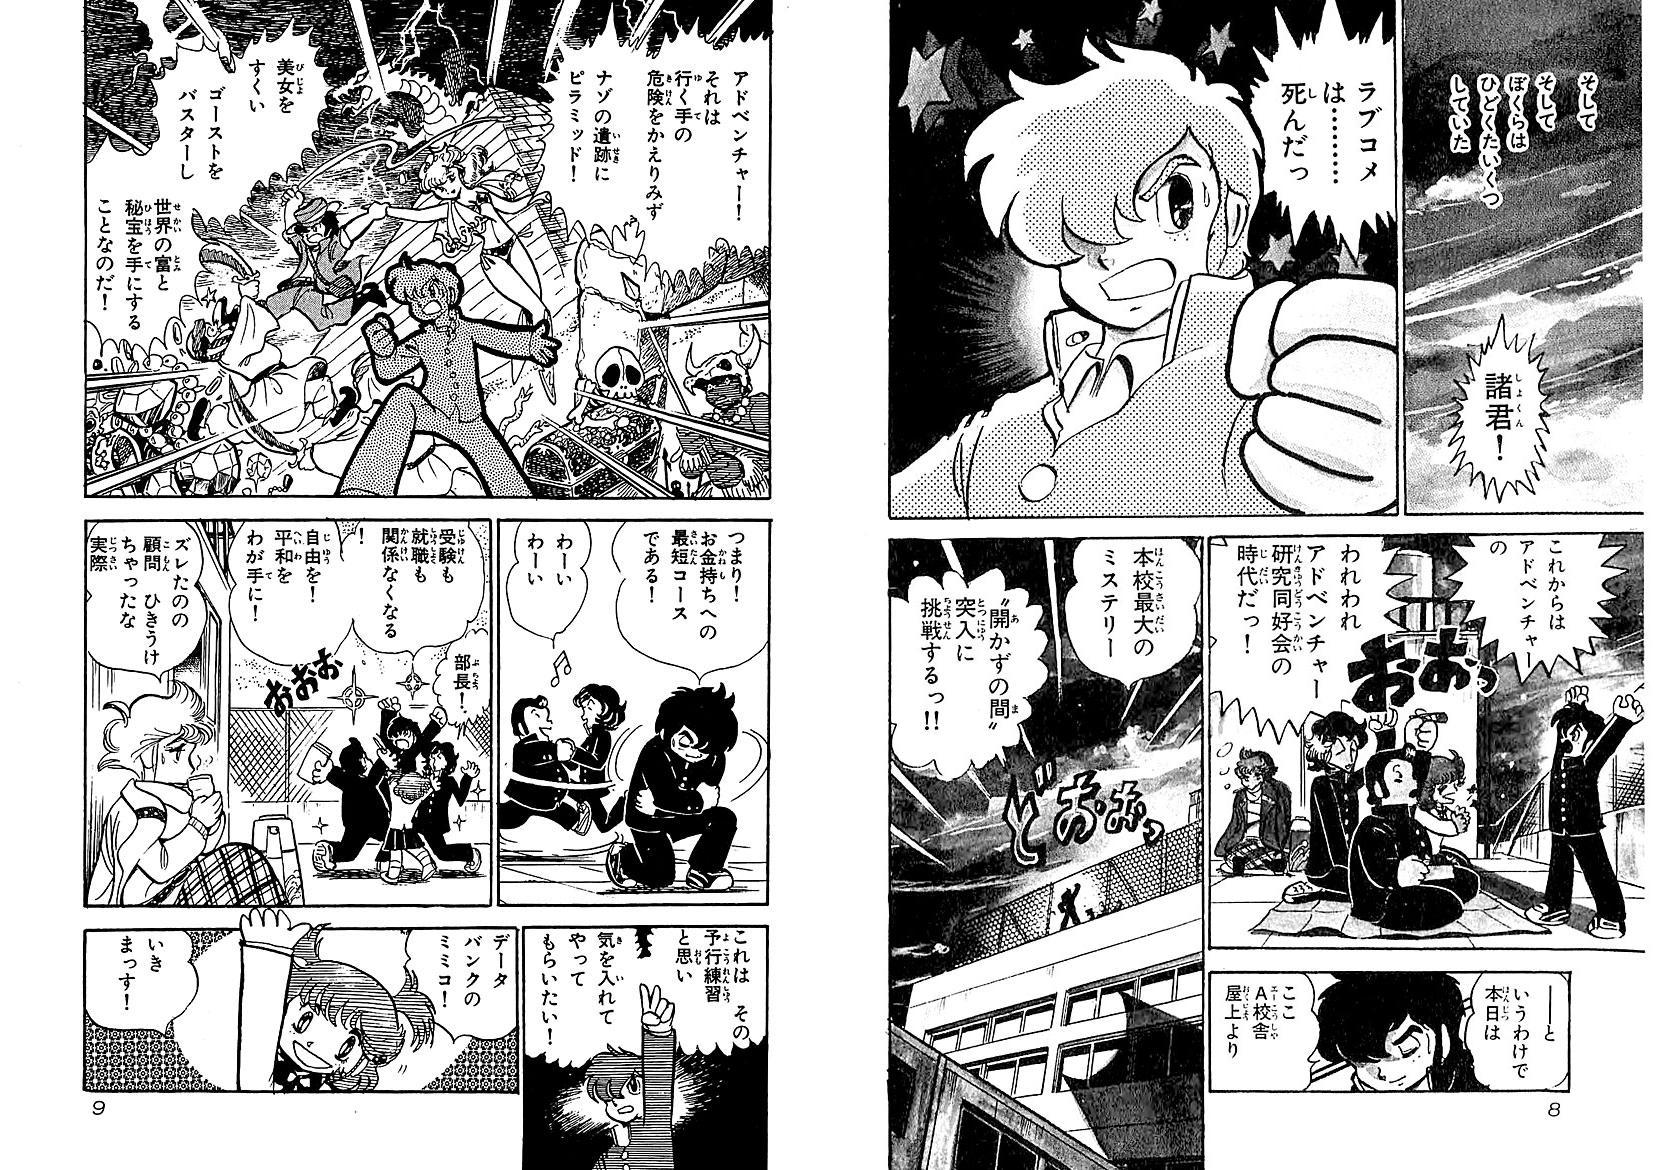

In [ ]:
image_004

In [28]:
# Each "content" is a list of dicts and you can add image/video/text modalities
story_interpretation = [
      {
          "role": "user",
          "content": [
              {"type": "text", "text": "you are a reader and now reading this \
              manga page, and try to understand the story in it. You should \
              follow this reading order: from left to right, from top to \
              bottom. the dialogue of characters are in Japanese. you can \
              translate the Japanese into English. Now tell the story in this \
              page.You are tasked with interpreting a Japanese manga panel and \
              retelling its story in English. The manga's text is written in \
              Japanese, and the reading order is from right to left, and top \
              to bottom. Translate all dialogue and captions into English and \
              reconstruct the story as a coherent narrative. Here's some \
              additional guidance and context: Image Layout: The manga panels \
              are arranged in a typical Japanese right-to-left format. Text \
              appears in speech bubbles, thought bubbles, and other captions.\n"
              },
              {"type": "image"},
              ],
      },
]

# Location
location_test_1 = [
      {
          "role": "user",
          "content": [
              {"type": "text", "text": "These are two pages of a manga. \
              Determine whether the location of the depicted scene is indoors \
              or outdoors. For this task, rely on the illustrations, locations \
              of previous or later panels and character dialogues and narration. \
              Take into account that the reading order of manga is from top right \
              to bottom left. Briefly explain why it is indoors or outdoors.\n"
              },
              {"type": "image"},
              ],
      },
]

location_test_2 = [
      {
          "role": "user",
          "content": [
              {"type": "text", "text": "Based on the double manga page, \
              determine the location of the depicted scenes. Answer with either \
              'Indoors' or 'Outdoors', with a brief explanation as to why you \
              made the decision. Make use of visual clues gathered from the \
              drawings, dialogue and context from previous or later panels. \
              Keep in mind that manga are read top-to-bottom, right-to-left.\n"
              },
              {"type": "image"},
              ],
      },
]

# Time of Day

time_test_1 = [
      {
          "role": "user",
          "content": [
              {"type": "text", "text": "Determine whether the scenes in the \
              following manga pages take place during the day or at night. Rely on \
              the illustrations, the context clues from previous and later panels, \
              the dialogue and narration. The reading order in manga such as \
              this is top-to-bottom, right-to-left. Give a brief explanation of \
              how you came to your conclusion.\n"
              },
              {"type": "image"},
              ],
      },
]

time_test_2 = [
      {
          "role": "user",
          "content": [
              {"type": "text", "text": "In the manga double-page the scene or \
              scenes take place during either daytime or nighttime. Use the \
              drawings, surrounding panels, dialogue and narration to find out \
              at what time of day the scenes take place. Give a short \
              explanation of your decision. \n"
              },
              {"type": "image"},
              ],
      },
]

# Weather

weather_test_1 = [
      {
          "role": "user",
          "content": [
              {"type": "text", "text": "There are two manga pages provided in \
              the image file. Manga are traditionally read right-to-left. \
              Determine whether the weather in the depicted scene is sunny or \
              rainy, while relying on the illustrations, dialogue and previous \
              and following panels.\n"
              },
              {"type": "image"},
              ],
      },
]

weather_test_2 = [
      {
          "role": "user",
          "content": [
              {"type": "text", "text": "There are two manga pages provided in \
              the image file. Manga are traditionally read right-to-left. \
              Determine whether the weather in the depicted scene is sunny or \
              rainy, while relying on the illustrations, dialogue and previous \
              and following panels.\n"
              },
              {"type": "image"},
              ],
      },
]

# Character Count

character_test = [
      {
          "role": "user",
          "content": [
              {"type": "text", "text": "In the provided manga pages, determine \
              how many different characters there are. Pay special attention to \
              the unique traits of each character, ranging from their design, \
              their clothing and their way of speaking. When considering context \
              from other panels, keep in mind that manga are read from top left \
              to bottom right. As a response, give a number in arabic numerals.\n"
              },
              {"type": "image"},
              ],
      },
]

# Next Panel Inference
inference_test = [
      {
          "role": "user",
          "content": [
              {"type": "text", "text": "Describe and infer the reading order \
              of manga panels by following these rules: consider traditional \
              Japanese manga flow from right to left and top to bottom unless \
              explicitly stated otherwise; observe panel boundaries, gutters, \
              and their relative positioning; prioritize panels aligned in the \
              same row before moving downward, and interpret overlapping or \
              unconventional layouts by focusing on visual cues like character \
              gaze, speech bubble placement, or action continuity to determine \
              the intended sequence."
              },
              {"type": "image"},
              ],
      },
]


story_prompt = processor.apply_chat_template(story_interpretation, add_generation_prompt=False)
location_prompt_1 = processor.apply_chat_template(location_test_1, add_generation_prompt=False)
location_prompt_2 = processor.apply_chat_template(location_test_2, add_generation_prompt=False)
time_prompt_1 = processor.apply_chat_template(time_test_1, add_generation_prompt=False)
time_prompt_2 = processor.apply_chat_template(time_test_2, add_generation_prompt=False)
weather_prompt_1 = processor.apply_chat_template(weather_test_1, add_generation_prompt=False)
weather_prompt_2 = processor.apply_chat_template(weather_test_2, add_generation_prompt=False)
character_prompt = processor.apply_chat_template(character_test, add_generation_prompt=False)
inference_prompt = processor.apply_chat_template(inference_test, add_generation_prompt=False)
#all prompts here are examples, we changed all the prompts for many times

In [26]:
location_prompt_1

'<|im_start|>user <image>\nThese are two pages of a manga.               Determine whether the location of the depicted scene is indoors               or outdoors. For this task, rely on the illustrations, locations               of previous or later panels and character dialogues and narration.               Take into account that the reading order of manga is from top right               to bottom left. Briefly explain why it is indoors or outdoors.\n<|im_end|>'

In [16]:
def get_text(path_image, prompt):
  inputs = processor(images=[path_image], text=[prompt], padding=True, return_tensors="pt").to(model.device, torch.float16)
  generate_kwargs = {"max_new_tokens": 300, "do_sample": True, "top_p": 0.9}

  output = model.generate(**inputs, **generate_kwargs)
  generated_text = processor.batch_decode(output, skip_special_tokens=True)
  return generated_text

In [22]:
get_text(image_004, time_prompt_1)

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


['user \nDetermine whether the scenes in the               following manga pages take place during the day or at night. Rely on               the illustrations, the context clues from previous and later panels,               the dialogue and narration. The reading order in manga such as               this is top-to-bottom, right-to-left. Give a brief explanation of               how you came to your conclusion.\n\nassistant\nThe scenes in the following manga pages take place at night. This is indicated by the lack of any explicit daytime elements such as bright sunlight or the presence of characters engaged in nighttime activities like reading or interacting with friends in the dark. Additionally, the atmosphere of the scene is darker and more ominous, with a sense of tension and drama, which are common in nighttime settings in manga.']

In [29]:
images = [("image_002.jpg", image_002),
          ("image_003.jpg", image_003),
          ("image_004.jpg", image_004),
          ("image_005.jpg", image_005),
          ("image_006.jpg", image_006),
          ("image_007.jpg", image_007),
          ("image_008.jpg", image_008),
          ("image_009.jpg", image_009),
          ("image_010.jpg", image_010),
          ("image_011.jpg", image_011),
          ("image_012.jpg", image_012),
          ("image_013.jpg", image_013),
          ("image_014.jpg", image_014),
          ("image_015.jpg", image_015),
          ("image_016.jpg", image_016),
          ("image_017.jpg", image_017),
          ("image_018.jpg", image_018),
          ("image_019.jpg", image_019),
          ("image_020.jpg", image_020),
          ("image_021.jpg", image_021),
          ("image_022.jpg", image_022),
          ("image_023.jpg", image_023),
          ("image_024.jpg", image_024),
          ("image_025.jpg", image_025),
          ("image_026.jpg", image_026),
          ("image_027.jpg", image_027),
          ("image_028.jpg", image_028),
          ("image_029.jpg", image_029),
          ("image_030.jpg", image_030),
          ("image_031.jpg", image_031),
          ("image_032.jpg", image_032),
          ("image_033.jpg", image_033),
          ("image_034.jpg", image_034),
          ("image_035.jpg", image_035),
          ("image_036.jpg", image_036),
          ("image_037.jpg", image_037),
          ("image_038.jpg", image_038),
          ("image_039.jpg", image_039),
          ("image_040.jpg", image_040),
          ("image_041.jpg", image_041),
          ("image_042.jpg", image_042),
          ("image_043.jpg", image_043),
          ("image_044.jpg", image_044),
          ("image_045.jpg", image_045),
          ("image_046.jpg", image_046),
          ("image_047.jpg", image_047),
          ("image_048.jpg", image_048),
          ("image_049.jpg", image_049),
          ("image_050.jpg", image_050),
          ("image_051.jpg", image_051),
          ("image_052.jpg", image_052),
          ("image_053.jpg", image_053),
          ("image_054.jpg", image_054),
          ("image_055.jpg", image_055),
          ("image_056.jpg", image_056),
          ("image_057.jpg", image_057),
          ("image_058.jpg", image_058),
          ("image_059.jpg", image_059),
          ("image_060.jpg", image_060),
          ("image_061.jpg", image_061),
          ("image_062.jpg", image_062),
          ("image_063.jpg", image_063),
          ("image_064.jpg", image_064),
          ("image_065.jpg", image_065),
          ("image_066.jpg", image_066),
          ("image_067.jpg", image_067),
          ("image_068.jpg", image_068),
          ("image_069.jpg", image_069),
          ("image_070.jpg", image_070),
          ("image_071.jpg", image_071),
          ("image_072.jpg", image_072),
          ("image_073.jpg", image_073),
          ("image_074.jpg", image_074),
          ("image_075.jpg", image_075),
          ("image_076.jpg", image_076),
          ("image_077.jpg", image_077),
          ("image_078.jpg", image_078),
          ("image_079.jpg", image_079),
          ("image_080.jpg", image_080),
          ("image_081.jpg", image_081),
          ("image_082.jpg", image_082),
          ("image_083.jpg", image_083),
          ("image_084.jpg", image_084),
          ("image_085.jpg", image_085),
          ("image_086.jpg", image_086),
          ("image_087.jpg", image_087),
          ("image_088.jpg", image_088),
          ("image_089.jpg", image_089),
          ("image_090.jpg", image_090),
          ("image_091.jpg", image_091),
          ("image_092.jpg", image_092),
          ("image_093.jpg", image_093),
          ("image_094.jpg", image_094),
          ("image_095.jpg", image_095),
          ("image_096.jpg", image_096),
          ("image_097.jpg", image_097),
          ("image_098.jpg", image_098),
          ("image_099.jpg", image_099),
          ]




Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_002.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n4']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_003.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n6']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_004.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe number of different characters in the manga pages is 14.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_005.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n3']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_006.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n8']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_007.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n2']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_008.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n4']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_009.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are a total of 5 characters in the manga pages. The unique traits of each character can be described as follows:\n\n- The first character has long black hair and is wearing a brown coat.\n- The second character has spiky white hair and is wearing a black outfit.\n- The third character has short black hair and is wearing a black outfit.\n- The fourth character has black hair and is wearing a black outfit with a bow.\n- The fifth character has brown hair and is wearing a brown outfit.\n\nThe first character stands o

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_010.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe number of different characters in the image is four. The characters in the top left panel have a unique hairstyle, the one in the center has the same hair but is taller, and the character in the bottom left is shorter with a more elongated head shape. The character in the bottom right has more pronounced hair compared to the other characters in the image.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_011.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are four different characters in the image. They all have unique traits ranging from their design to their clothing and their speaking style. Additionally, from other panels, they are not specific to one character.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_012.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 10 different characters in the manga pages. The first character has short, spiky hair and wears a white top with a blue tie. The second character has a large, round head and wears a green hat. The third character has a large, round head with a big nose and wears a black top with a white collar. The fourth character has a large, round head with black hair and wears a red and white striped top. The fifth character has a large, round head with white hair and wears a red and white striped top. The sixth character 

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_013.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n27']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_014.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n10']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_015.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 14 characters in this manga page. As the panel shows various characters, they are unique in terms of design, clothing, and their way of speaking. Some characters are depicted in full body panels, while others are in smaller panel sections. Some characters have unique poses and expressions, while others are shown with simple facial expressions. The characters are well-defined and distinguishable from each other in terms of their design, clothing, and style of speaking.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_016.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n7']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_017.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n22']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_018.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n4']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_019.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n1']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_020.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 14 different characters in the manga. Some of the unique traits of each character include their hair, clothing, and hairstyles. The hair colors range from black, brown, and dark brown to silver, black, and blond. The clothing colors range from black and gray to white and red. The hairstyles range from black and gray to brown and black.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_021.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n6']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_022.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n1']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_023.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n7']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_024.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 25 different characters in this manga. These include:\n\n- A young boy with spiky black hair and wearing a gray jacket, with a speech bubble with the word "oh"\n- A girl with long black hair, wearing a white dress and holding a sign that says "oh"\n- A young man with spiky brown hair, wearing a brown jacket, with a speech bubble with "oh"\n- A young man with spiky black hair, wearing a black hat, with a speech bubble with "oh"\n- A young girl with long black hair, wearing a white dress, with a speech bubble wi

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_025.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n5']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_026.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe image shows a total of 6 different characters. Here is a breakdown:\n\n1. The first character is dressed in a dark outfit with a mustache, and is wearing glasses, and is standing with one hand in his pocket.\n2. The second character is wearing a dress, glasses, and a mustache, and is holding a book in his hands.\n3. The third character is wearing a dark dress and glasses, and is standing with one arm extended.\n4. The fourth character is wearing a dark dress and glasses, holding a book in their hands.\n5. The fifth 

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_027.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are five different characters. The first character has long straight hair and is wearing a blue jacket, the second character has shoulder length hair and is wearing a green jacket, the third character has a black bow tie and is wearing a purple outfit, the fourth character has red hair and is wearing a red jacket, and the fifth character has black hair and is wearing a black outfit with a red and blue hat.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_028.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 8 different characters in the manga pages. The characters have unique hairstyles, clothing, and speech patterns. The characters in the top row have dark hair and are dressed in white suits, while the characters in the bottom row have light hair and are dressed in dark suits. The characters in the middle row have dark hair and are dressed in gray coats, while the characters in the middle row have light hair and are dressed in blue suits. The characters in the top row have dark hair and are dressed in red suits,

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_029.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n5']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_030.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n23']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_031.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 20 different characters in this manga. \n\n1. The character on the right has a white face with brown hair and is dressed in a plain white outfit.\n2. The character in the middle has white skin, short hair, and is wearing a short-sleeved shirt with a tie.\n3. The character on the left has brown hair, brown eyes, and a bow tie.\n4. The character in the bottom left has brown hair, blue eyes, and is wearing a black outfit.\n5. The character in the middle has brown hair, white skin, and is wearing a simple white ou

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_032.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n6']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_033.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n6']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_034.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 21 characters in the manga. The first character is male, the second is female, the third is male, the fourth is female, the fifth is female, and the sixth is male. The first character has long hair, the second has short hair, the third has short hair, the fourth has short hair, the fifth has long hair, and the sixth has long hair. The first character is wearing a blue jacket, the second wears a brown shirt, the third wears a black jacket, the fourth wears a white dress, the fifth wears a white and blue dress, 

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_035.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n22']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_036.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n3']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_037.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe number in arabic numerals is 4.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_038.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n10']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_039.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n79']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_040.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n4']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_041.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n93']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_042.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n7']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_043.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n10']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_044.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n80']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_045.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe number of different characters in the manga is 3. The characters are:\n- A boy wearing a hat\n- A boy with a beard and mustache\n- A girl with long hair and black hair']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_046.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe characters in the provided manga pages are:\n\n1. Person 1 (leftmost panel): Appears to be a male with short hair and is wearing a dark jacket.\n2. Person 2 (top middle panel): Appears to be a female with long hair and is wearing a brown sweater.\n3. Person 3 (top right panel): Appears to be a male with long hair and is wearing a white sweater.\n4. Person 4 (middle left panel): Appears to be a male with short hair and is wearing a dark jacket.\n5. Person 5 (middle right panel): Appears to be a female with long hair 

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_047.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n7']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_048.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n6']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_049.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nIn the provided manga pages, there are 12 different characters. Here is a breakdown of each character:\n\n1. A character wearing a blue shirt and white pants with a black tie and a book on their desk. They have short black hair and a black scarf wrapped around their neck. This character is standing in front of a desk with books and a calculator.\n2. A character with black hair tied in a ponytail, wearing a red shirt and black pants with a white collar. They are standing in front of a desk with papers and a pencil on the

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_050.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 22 characters in the manga. Pay special attention to the unique traits of each character, ranging from their design, clothing and way of speaking. When considering context, keep in mind that manga are read from top left to bottom right. As a response, the number in arabic numerals is: 22.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_051.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 12 characters in the manga pages. Pay special attention to the unique traits of each character, ranging from their design to their clothing and way of speaking. When considering context, keep in mind that manga are read from top left to bottom right.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_052.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe number is 13.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_053.jpg ["user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe number of different characters in the manga is 13. Each character has unique traits such as different hairstyles, clothing styles, and speech patterns. The characters in the image range from being young and energetic to more mature and perhaps slightly cynical. The characters' different hairstyles, clothing styles, and expressions vary throughout the panels, indicating a range of personalities and attitudes."]


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_054.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n26']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_055.jpg ["user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nIn the provided manga pages, there are a total of 8 different characters. The unique traits of each character include their distinct hairstyles, clothing styles, and expressions. Some characters have pointed ears, while others have round ears or no ears at all. Some characters have long hair, while others have short hair. The clothing styles also vary, with some characters wearing formal attire, while others are wearing more casual clothing. Some characters have bold hairstyles, while others have sleek, simple hairstyle

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_056.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe image contains 11 different characters, and here is a list of them:\n\n1. The first character on the left has spiky black hair, a white shirt, and is standing in the room with the other two characters.\n2. The second character has short black hair, a black top, and is also standing in the room with the first two characters.\n3. The third character has short black hair, a white shirt, and is seated on the floor near the first character.\n4. The fourth character has spiky black hair, a white shirt, and is also seated 

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_057.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n3']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_058.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe image contains 6 distinct characters and 7 unique traits:\n1. Person on the left wearing glasses\n2. Person wearing a white and blue outfit\n3. Person with short brown hair\n4. Person with spiky dark hair\n5. Person with short white hair\n6. Person wearing a white and red top\n7. Person wearing glasses and white shirt']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_059.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n4']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_060.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nIn the provided image, there are a total of 11 different characters, which can be counted in the following way:\n\n1. The first character on the far left is a person with short, dark hair.\n2. Next to the first character is a person with a shaved head, dark hair, and a white shirt.\n3. The third character is a person with long hair tied in a ponytail.\n4. The fourth character is a person with short, blond hair and a black outfit.\n5. The fifth character is a person with long, black hair and a white outfit.\n6. The sixth

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_061.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe image you provided appears to be a comic strip or manga page featuring several characters in a conversation. Below is a numerical breakdown of the characters and their unique traits as observed in the image:\n\n- **Characters:**\n  - **Person 1:**\n    - A male character with long hair, wearing a casual, t-shirt-like top.\n    - A small, curious expression.\n    - One hand is raised, possibly gesturing or holding something.\n    - There is a speech bubble indicating he is speaking.\n  - **Person 2:**\n    - A female

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_062.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 30 different characters in the manga pages. Here is a breakdown of each character:\n\n1. The first character on the left is the female protagonist, who has black hair and wears a black and white outfit.\n2. The second character is the male protagonist, who has brown hair and wears a white outfit with a black shirt.\n3. The third character is another male protagonist, who has white hair and wears a white outfit with a black belt.\n4. The fourth character is the female protagonist, who has brown hair and wears a

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_063.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n5']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_064.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n7']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_065.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n3']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_066.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n6']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_067.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe number in arabic numerals is 20.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_068.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 15 characters in the manga. The first character has short black hair, a hat, and is in a fighting stance with their right hand raised. The second character has short black hair, wears a polka dot shirt, and is looking at the first character with a worried expression. The third character has black hair, wears a white shirt with a dark vest and a mask covering their mouth and nose. The fourth character has short brown hair, wears a white shirt, and is looking at the third character with a confused look. The fift

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_069.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n7']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_070.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 12 different characters in the manga. The first character is a man with black hair and white teeth, wearing a white shirt. The second character is a girl with long black hair and a black and white dress. The third character is a man with blonde hair and a white shirt. The fourth character is a girl with black hair and a white shirt. The fifth character is a man with black hair and a blue shirt. The sixth character is a girl with short black hair and wearing a white shirt with a red bow in her hair. The seventh

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_071.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nIn the provided manga pages, there are 8 different characters. When considering the unique traits of each character, they range from their design, clothing and their way of speaking, to context from other panels. As a response, a number in Arabic numerals is 512.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_072.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n1']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_073.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n5']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_074.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are five different characters. Each character has unique traits and clothing. Here is the number in Arabic numerals:\n\n1. Left panel: Character with black hair, is wearing a black shirt and a brown apron. The person is holding a large spoon and a bowl.\n\n2. Top left panel: Character with black hair is wearing a black and white checkered shirt. The person is talking to a character with black hair who is wearing a black jacket.\n\n3. Top right panel: A character with black hair and wearing a white shirt with a bla

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_075.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe number of different characters in the image is 7.\n\n1. There are 2 different men with detailed and distinct clothing designs in the left half of the panel, each with his own expression and posture.\n2. The character on the left is a young male with a messy appearance, and he appears to be the focus of the scene in the left half of the panel.\n3. The character in the center has a more refined and elegant appearance with a more neutral expression, and he is positioned on the left side of the image.\n4. The character 

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_076.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n21']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_077.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n110']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_078.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n4']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_079.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n3']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_080.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n7']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_081.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe number in Arabic numerals is 10']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_082.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n30']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_083.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n2']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_084.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n3']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_085.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 7 different characters in the manga pages. They are: one male character with long hair, one male character with short hair, one female character, one man with glasses, one man in a suit, one man with a notebook, and one male character with brown hair and a brown vest. The male characters are differentiated by their clothing, hairstyles, and clothing styles, while the female characters have distinct hair and clothing styles. The male character with glasses has different hair and clothing styles compared to the 

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_086.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n8']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_087.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n5']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_088.jpg ["user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe image appears to be a series of panels in a manga or comic book, showcasing various scenes and characters. It seems to be a compilation of different scenes where characters are engaged in a discussion or interaction with one another, as indicated by the dialogue bubbles containing Japanese text.\n\nThe number in Arabic numerals that would typically be used to represent the number of different characters in a manga or comic would be approximately 10. There is a visible amount of dialogue and a sense of narrative prog

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_089.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n6']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_090.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n23']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_091.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are 13 characters in this manga page. They all have different hairstyles and clothing, and they all have speech bubbles with Japanese text. Some characters have one hairstyle or one clothing item, while others have more than one.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_092.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n4']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_093.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThere are four different characters in this manga. These characters are:\n1. A boy with spiky black hair, wearing a white shirt and blue pants.\n2. A boy with short black hair, wearing a white shirt and blue pants.\n3. A boy with long black hair, wearing a white shirt and blue pants.\n4. A boy with spiky brown hair, wearing a white shirt and blue pants.']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_094.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n4']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_095.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n4']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_096.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n6']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_097.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\n13']


Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_098.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe image contains a total of 2 characters. Here are their descriptions:\n\n1. The first character has short, curly hair, and is wearing a black top with a patterned skirt and a black cape. This character is described as a "bitchy" character who is strong in both numbers and strength.\n   - Description: The character has short, curly hair and is wearing a black top with a patterned skirt and a black cape.\n   - Traits: This character is described as a "bitchy" character with strong physical abilities and a deep passion 

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


image_099.jpg ['user \nIn the provided manga pages, determine               how many different characters there are. Pay special attention to               the unique traits of each character, ranging from their design,               their clothing and their way of speaking. When considering context               from other panels, keep in mind that manga are read from top left               to bottom right. As a response, give a number in arabic numerals.\n\nassistant\nThe answer is 4']


In [ ]:
with open('images.txt', 'w') as f:
    for image_name, image_obj in images:
        generated_text = get_text(image_obj, character_prompt)
        f.write(image_name + '\t' + generated_text[0] + '\n')
        print(image_name, generated_text)

In [ ]:
print(generated_text)

['user \nyou are a reader and now reading this manga page, and try to understand the story in it. You should follow this reading order: from left to right, from top to bottom. the dialogue of characters are in Japanese. you can translate the Japanese into English. Now tell the story in this page.assistant\nThe image you\'ve provided is a page from the "Super Anime" series by UoA Publishing. This particular page features three panels with accompanying dialogue and scenes from a manga. Here\'s the storyline as I interpret it based on the dialogue:\n\n1. The first panel depicts a large humanoid figure with a gas mask standing near a door in what appears to be a cluttered office environment. The dialogue box includes Japanese characters saying "大手君" (the name of the character), and it seems to discuss something negative.\n\n2. The second panel shows the same character in the gas mask, now facing away from the door. The character looks distressed and is talking to someone off-frame. The dia

## Evaluation

Largely Based on MangaUB, but replicated and modified as the benchmark is as of writing not publicly available.

Onamatopoeia will not be tested, unlike in MangaUB, as the tests done with Llava-NeXT showed the model's inability to run OCR on Onamatopoeia, which is an issue that is not adressed by Llava-OneVision

Test categories using prompting (e.g. "Is the weather in this panel sunny or rainy?")

Single Panel Tasks:
 - **Location** (Output = "Indoors", "Outdoors")
 - **Time of Day** (Output = "Day", "Night")
 - **Weather** (Output = "Sunny", "Rainy")
 - **Character Count** (Output = Int)
 - **Emotion** - Only test if time permits, have to use KangaiSet annotations as gold standard https://link.springer.com/chapter/10.1007/978-3-031-41498-5_9

Multi Panel Tasks:
 - **Panel Localisation** - Take six panels from different Manga, all from the same test category (Location, Time, Weather). 5 Panels are one option, 1 is the other option, have Llava figure out the one that doesn't belong. Lots of manual labour...
 - **Next Panel Inference** - Get all 4-Panel Manga from Manga109, keep 3 panels as context, make Llava guess the next Panel from a choice of 3 panels. 1 is correct, 2 others randomly taken from the same manga. Lots of manual labour too...


# pop manga


# lora


In [1]:
!pip install peft datasets accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from peft import LoraConfig, get_peft_model

# 定义 LoRA 配置
lora_config = LoraConfig(
    r=8,  # 降维的秩
    lora_alpha=32,  # LoRA 的 alpha 参数
    target_modules=["q_proj", "v_proj"],  # 目标模块，适用于大多数模型的注意力部分
    lora_dropout=0.1,  # Dropout 的比例
    bias="none",  # LoRA 是否添加偏置
    task_type="CAUSAL_LM"  # 任务类型
)

# 包装模型为支持 LoRA 的模型
model = get_peft_model(model, lora_config)


NameError: name 'model' is not defined